In [1]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
import torch

In [2]:
batch_size =  1024
dataset = MNIST('.', train=True, transform=transforms.ToTensor(), download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [3]:
data_iter = iter(dataloader)
images, labels = next(data_iter)

In [4]:
images[1].shape

torch.Size([1, 28, 28])

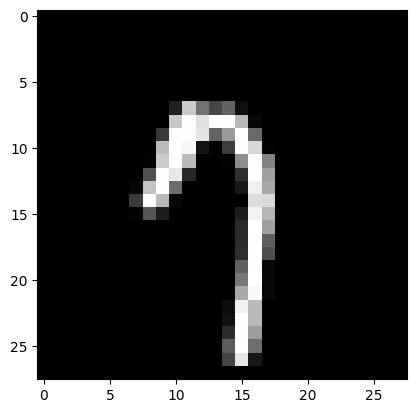

In [5]:
plt.imshow(images[1].squeeze(), cmap='gray')

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

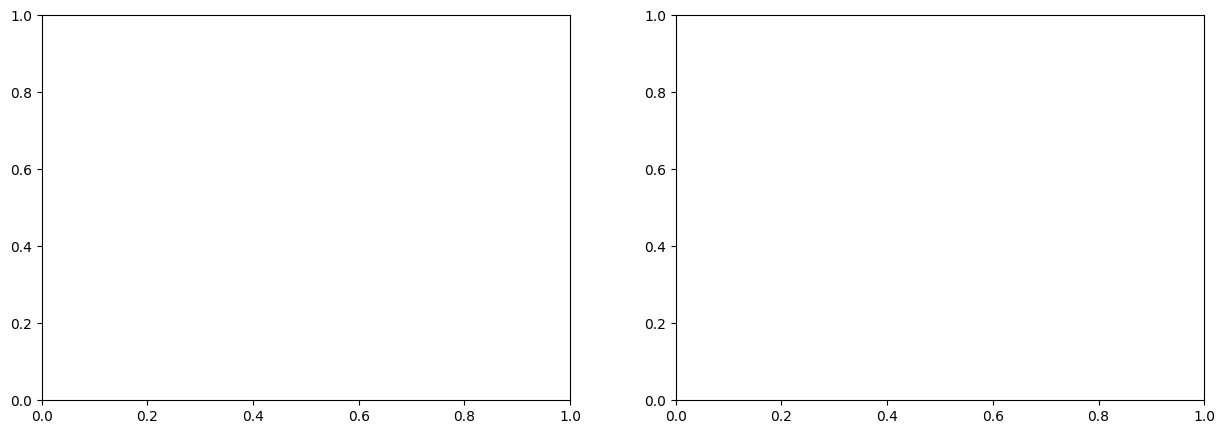

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
random_noise = torch.rand_like(images[1])*.05
noise_image = images[1] + random_noise
ax.imshow(noise_image.squeeze())

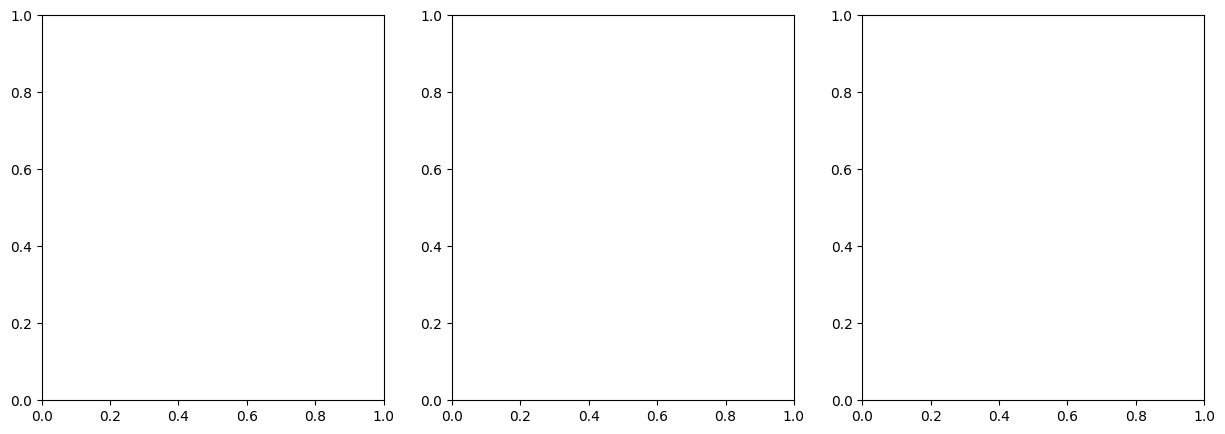

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

In [94]:
def denoise(images, t):
    b = 0.1
    for i in range(t):
        random_noise = torch.rand_like(images) * b
        b+=0.002
        noise_image = images + random_noise
    plt.imshow(noise_image.permute(1, 2, 0).numpy())

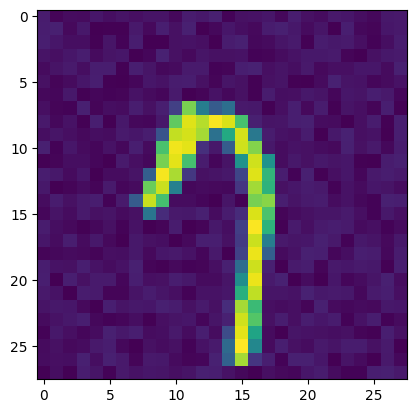

In [96]:
denoise(images[1], 1)

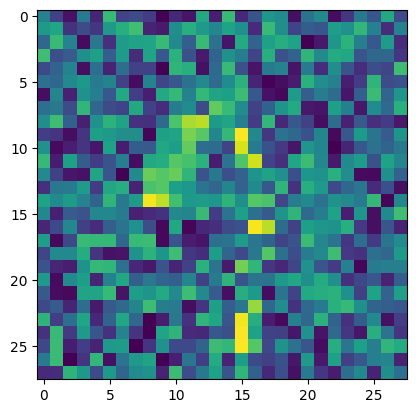

In [97]:
denoise(images[1], 1000)

In [92]:
def denoise_image(images, t):

    fig, axes = plt.subplots(1, t, figsize=(15, 5))

    if t == 1:
        axes = [axes]
    b = 0.1
    for i, ax in enumerate(axes):
        random_noise = torch.rand_like(images) * b
        b+=0.002
        noise_image = images + random_noise
    plt.imshow(noise_image.permute(1, 2, 0).numpy())
        # ax.axis('off')
        # ax.set_title(f"Noise {i+1}")


C:\Users\trikh\AppData\Local\Temp\ipykernel_21092\3195482635.py:16: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


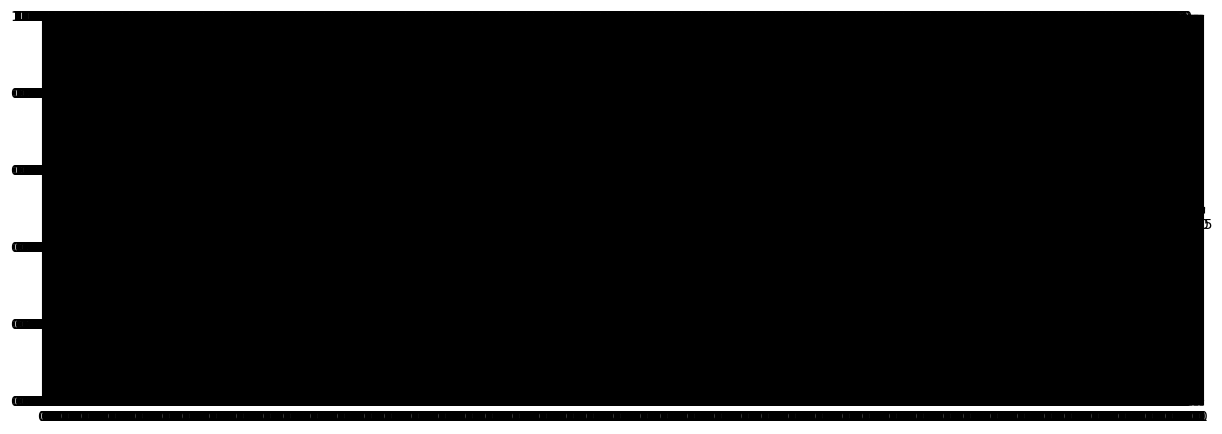

In [93]:
denoise_image(images[1], 990)

In [27]:
random_noise = torch.rand_like(images[1])*.05
noise_image = images[1] + random_noise
noise_image.shape

torch.Size([1, 28, 28])

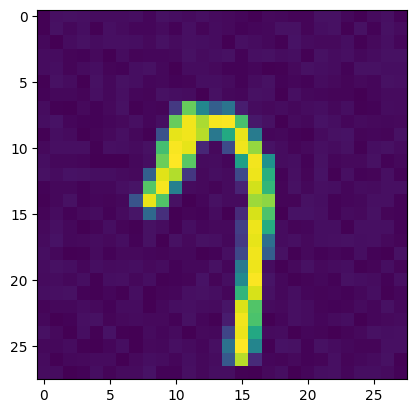

In [28]:
plt.imshow(noise_image.squeeze())